## Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

-- first we should import some variables from data cleaning process

In [2]:
%store -r df
df = df

%store -r numerical_columns
numerical_columns = numerical_columns

%store -r categorical_columns
categorical_columns = categorical_columns

## Descriptive Analysis

### Numerical Data

Analyzing the descriptive statistics of quantitative variables. Measurements of central tendency, dispersion etc
will draw the distribution plot to compare it with normal distribution

In [3]:
numerical_columns

['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'Price']

In [4]:
def kde_plot(x):
    '''
    kde_plot: This function draws a kernel density estimate (KDE) plot
    to visualize the distribution of a numerical column in a DataFrame.
    '''
    plt.figure(figsize=(12,3))

    sns.distplot(df[x[0]], kde_kws={'lw':5}, hist_kws={'alpha':0.25})
    
    # Remove the left spine
    sns.despine(left = True)

    # Compute mean and median
    mean = df[x[0]].mean()
    median = df[x[0]].median()

    # Add vertical lines
    plt.axvline(mean, color='black', linestyle='dashed')
    plt.axvline(median, color='green', linestyle='solid')

    return plt.show()

- statistical intrepretation of quantitative variables

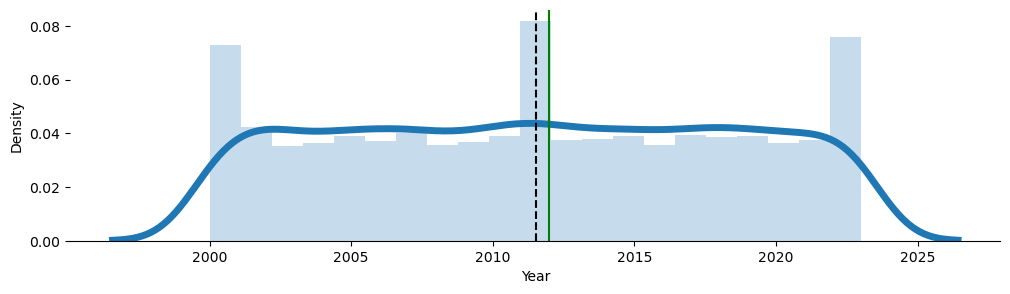

In [5]:
kde_plot([numerical_columns[0]]) # year

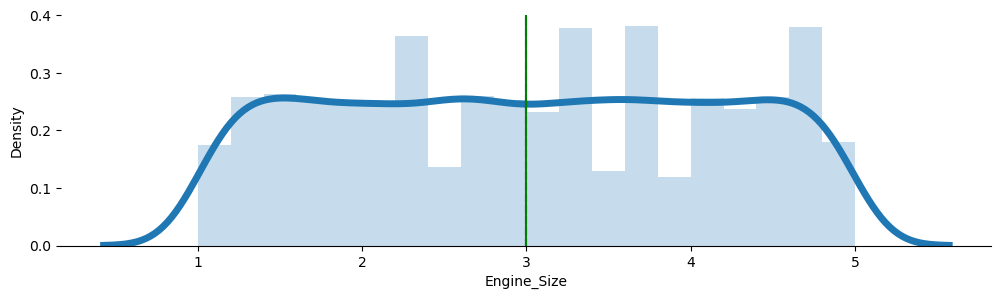

In [6]:
kde_plot([numerical_columns[1]]) # Engine size

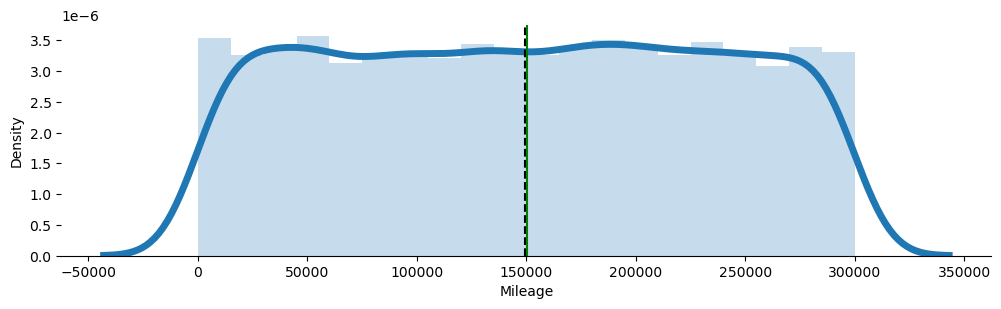

In [7]:
kde_plot([numerical_columns[2]]) # Mileage

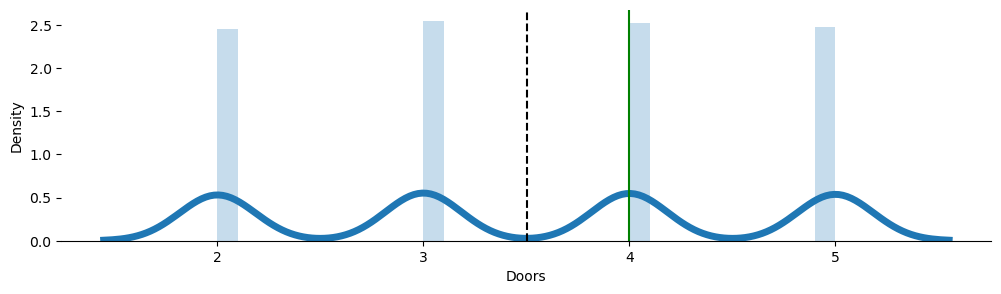

In [8]:
kde_plot([numerical_columns[3]]) # Doors

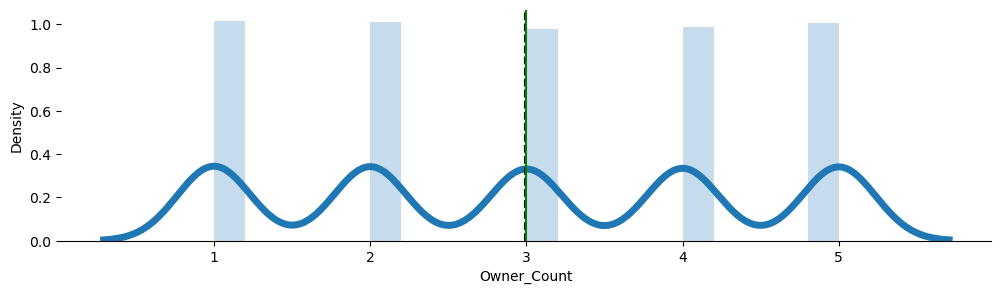

In [9]:
kde_plot([numerical_columns[4]]) # Owner count

None of the above columns need any transformations later

### Categorical Data

Find the mode of categorical columns to see which category repeated more than rest.

In [10]:
categorical_columns

['Brand', 'Model', 'Fuel_Type', 'Transmission']

In [11]:
print(categorical_columns[0], '->', df[categorical_columns[0]].mode()[0])
print(categorical_columns[1], '->', df[categorical_columns[1]].mode()[0])
print(categorical_columns[2], '->', df[categorical_columns[2]].mode()[0])
print(categorical_columns[3], '->', df[categorical_columns[3]].mode()[0])

Brand -> Audi
Model -> Accord
Fuel_Type -> Electric
Transmission -> Manual


## Correlation Analysis

### Numerical Data (Pearson Correlation)

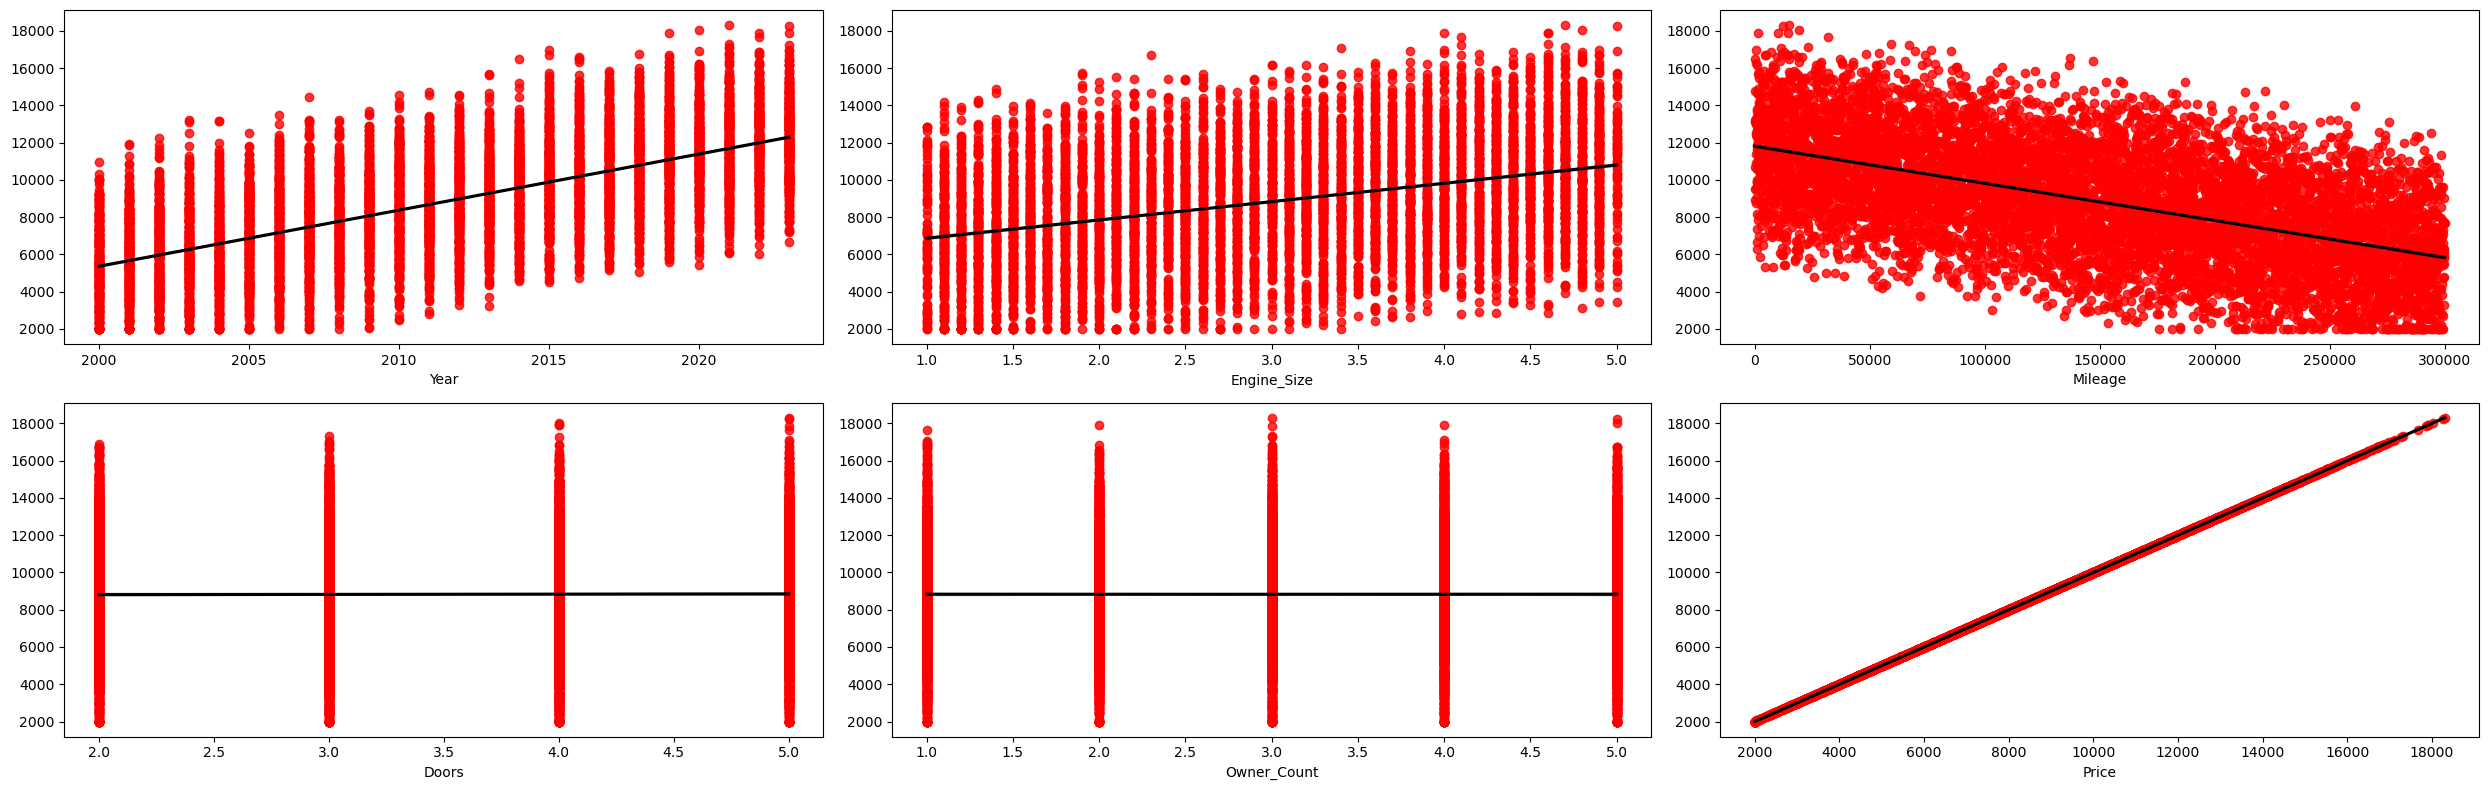

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(25, 8))
axes = axes.ravel()

for i, col in enumerate(numerical_columns):
    sns.regplot(
        x = col,
        y = 'Price',
        data = df,
        ax = axes[i],
        scatter_kws = {'color':'red'},
        line_kws = {'color':'black'}
    )

    axes[i].set_xlabel(col)
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

#### insights

1. Newer models have higher price and they have `POSITIVE` relationship.
2. Cars having bigger Engine Size have higher price and they have a `POSITIVE` relationship.
3. Cars with more Mileage have lesser price and they have a `NEGATIVE` relationship.
4. Doors and Owners count have no specific relation to price.

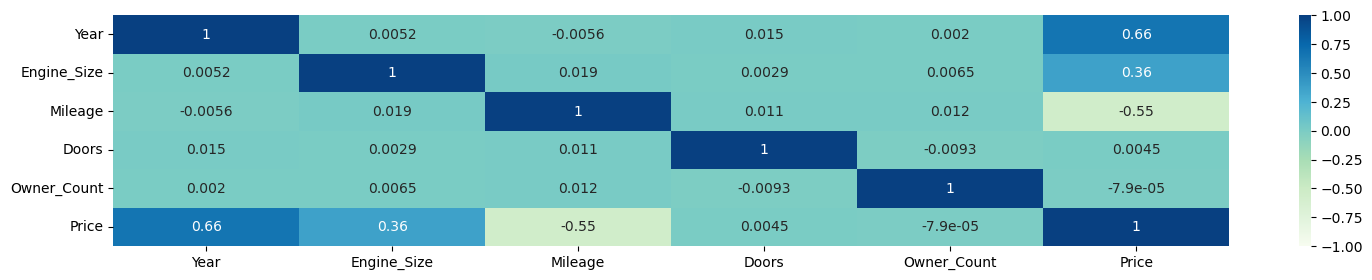

In [13]:
pearson_cor = df[numerical_columns].corr(method='pearson')
plt.figure(figsize=(18,3))

sns.heatmap(
    pearson_cor,
    vmin = -1,
    vmax = 1,
    cmap = 'GnBu',
    annot = True
)

plt.show()

### Categorical Data (ANOVA)

In [14]:
for i in categorical_columns:
    formula = f'Price ~ C({i})' # Ensures categorical variables are treated correctly
    model = ols(formula, data=df).fit()
    anova = sm.stats.anova_lm(model, type=2)
    p_value = anova['PR(>F)'].iloc[0] # Correct way to extract p-value

    print('P-Value of Price ~ {} - {}'.format(i, p_value))

P-Value of Price ~ Brand - 0.1831756268400974
P-Value of Price ~ Model - 0.5977964773741584
P-Value of Price ~ Fuel_Type - 1.1608569649137469e-129
P-Value of Price ~ Transmission - 6.731887149616531e-116


According to the results, we can come up that,

- `Fuel` and `Transmission` are significant to explain the price of car, because the p-value is less than 0.05 and we reject null hypothesis.
- However, `Brand` and `Model` might not bring positive impact on our model

Now we need to see for each label in the above categorical variable, which of them has the most impact on price.

In [15]:
## Creating a function to find the mean for each label in each categorical variable

def mean_pairwise(cat_var):
    mean_by = df.groupby(cat_var)['Price'].mean()
    mean_by = pd.DataFrame(mean_by)
    mean_by = mean_by.sort_values(by=['Price'], inplace=False, ascending=False)

    return mean_by.head(5) # first 5 rows from descending order

In [16]:
mean_pairwise(categorical_columns[0]) # Brand

,Price
Brand,
Chevrolet,9018.451815
Audi,8931.886016
Volkswagen,8901.128019
Mercedes,8892.547554
Kia,8885.963731


In [17]:
mean_pairwise(categorical_columns[1]) # Model

,Price
Model,
Tiguan,9146.532423
Impala,9094.073944
Equinox,9093.704453
Q5,9028.094406
Corolla,8995.060377


In [18]:
mean_pairwise(categorical_columns[2]) # Fuel

,Price
Fuel_Type,
Electric,10061.022662
Hybrid,9094.456689
Diesel,8091.958829
Petrol,8017.726901


In [19]:
mean_pairwise(categorical_columns[3]) # Transmission

,Price
Transmission,
Automatic,9954.639456
Manual,8338.461027
Semi-Automatic,8204.673971


#### insights

1. Chevrolet has the highest average price in Brands while Tiguan has the highest average price in Model
2. Electric cars are more acceptable
3. Even though manual cars are more frequent, Automatic transmission has the highest average.